# Data Understanding

Error: Library not loaded: @rpath/liblapack.3.dylib
Solution: !pip install --upgrade --force-reinstall scikit-learn

In [ ]:
# !conda install -c anaconda pandas --yes
# !conda install -c conda-forge matplotlib --yes
# !conda install -c anaconda seaborn
# !conda install -c conda-forge dabl
# !pip install dabl
# !conda install scikit-learn
# !pip install --upgrade --force-reinstall scikit-learn
# !pip install numpy --upgrade
# !conda uninstall numpy --yes
# !conda install numpy --yes
# !conda install pandas --yes
# !conda install matplotlib --yes
!conda install dabl

Solving environment: done

## Package Plan ##

  environment location: /Users/jameslim/miniforge3/envs/env_avikumar

  added / updated specs:
    - dabl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py39h02fc5c5_1005         351 KB  conda-forge
    charset-normalizer-2.1.1   |     pyhd8ed1ab_0          36 KB  conda-forge
    cryptography-39.0.1        |   py39he2a39a8_0         1.0 MB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    pyopenssl-23.0.0           |     pyhd8ed1ab_0         124 KB  conda-forge
    pysocks-1.7.1              |     pyha2e5f31_6          19 KB  conda-forge
    requests-2.28.2            |     pyhd8ed1ab_0          55 KB  conda-forge
    scikit-learn-1.2.1         |   py39h57c6424_0         6.5 MB  conda-forge
    scipy-1.10.1               |   py39h18313fe_0        19.2 MB  conda-forge

In [1]:
# importing pandas
import pandas as pd

# using pandas read_csv function to load the dataset
# df = pd.read_csv("/kaggle/input/road-traffic-severity-classification/RTA Dataset.csv")
df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [2]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3]:
# Find the number of missing values present in each column
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

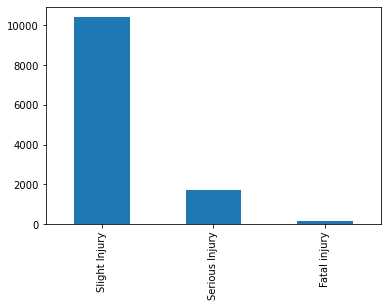

In [4]:
# target variable classes counts and bar plot
import matplotlib.pyplot as plt
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

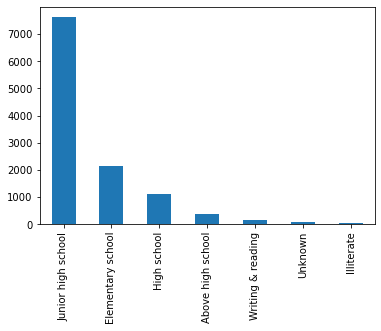

In [5]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

/Users/jameslim/miniforge3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Target looks like classification
Showing only top 10 of 31 categorical features


/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only b

[[<Figure size 216x216 with 2 Axes>], None]

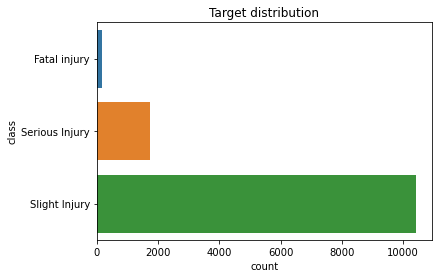

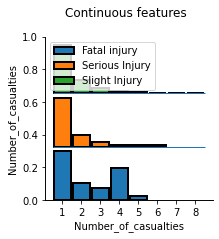

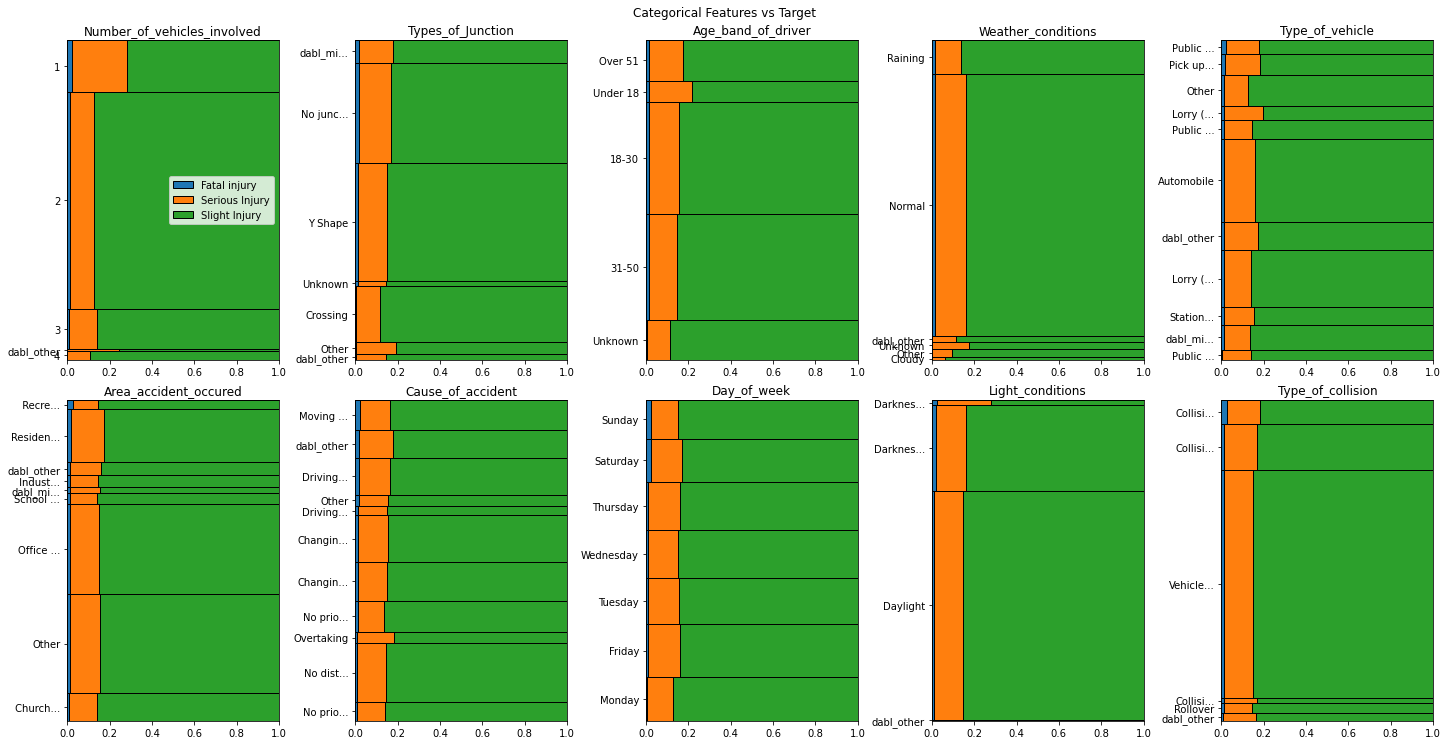

In [6]:
# Visualizing dataset using dabl library (added this myself)
import dabl

dabl.plot(df, target_col='Accident_severity')

<function matplotlib.pyplot.show(close=None, block=None)>

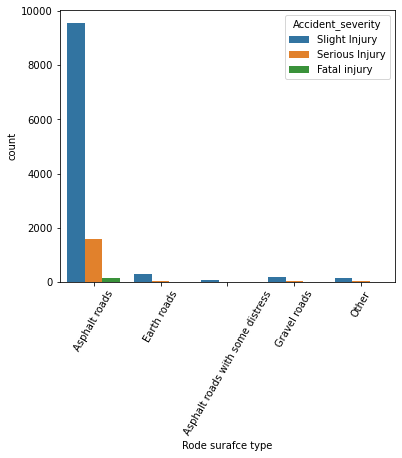

In [7]:
# import matplotlib (added this myself)
import matplotlib.pyplot as plt
import seaborn as sns

# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

# Data preparation

In [8]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [9]:
# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


<ipython-input-10-3176bf4942c2>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


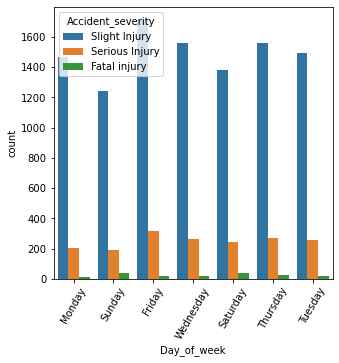

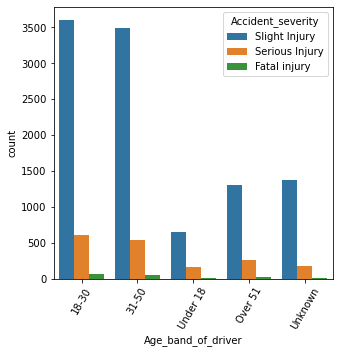

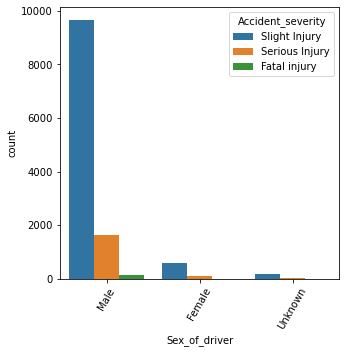

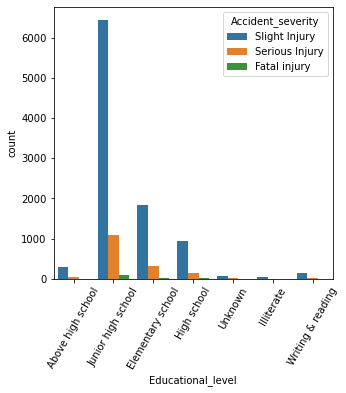

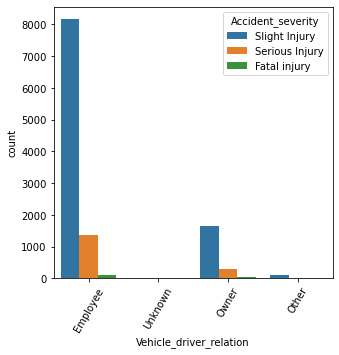

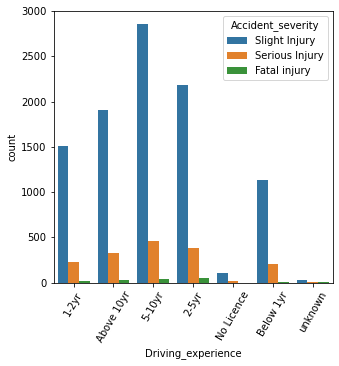

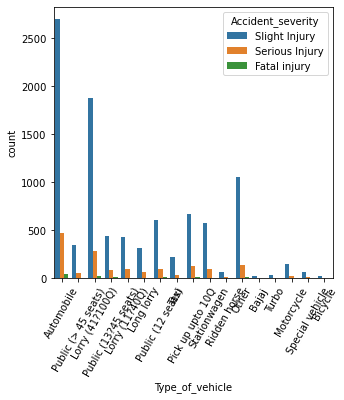

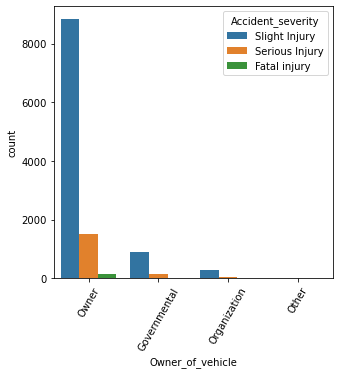

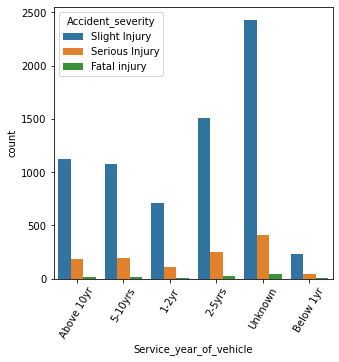

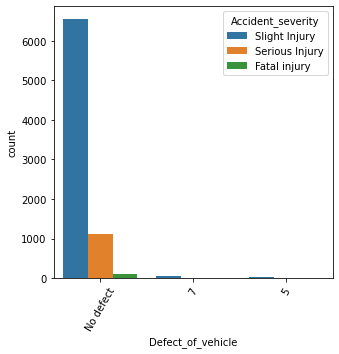

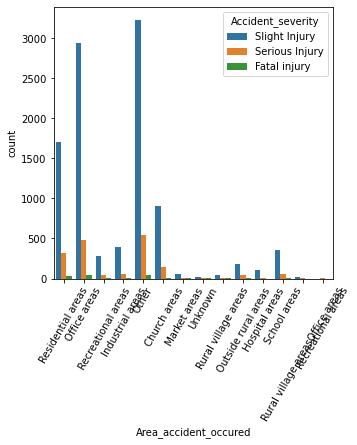

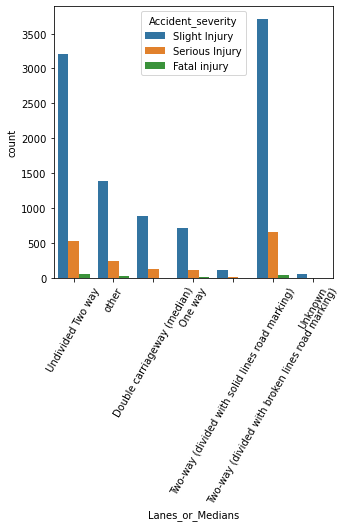

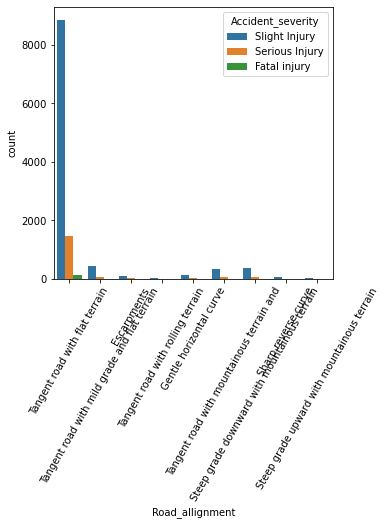

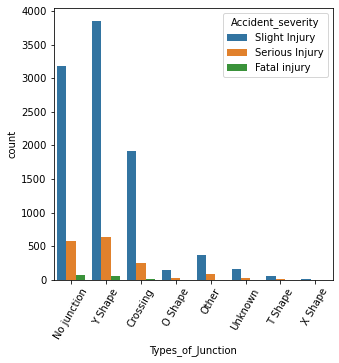

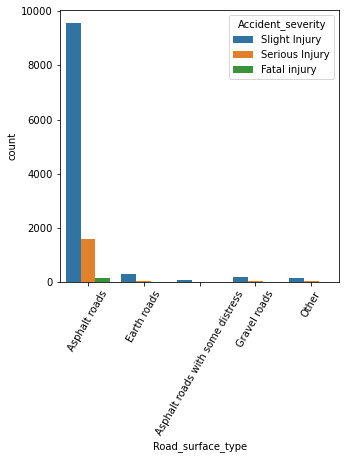

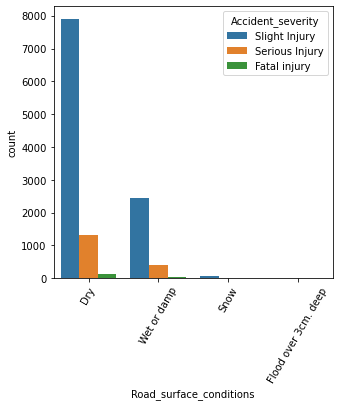

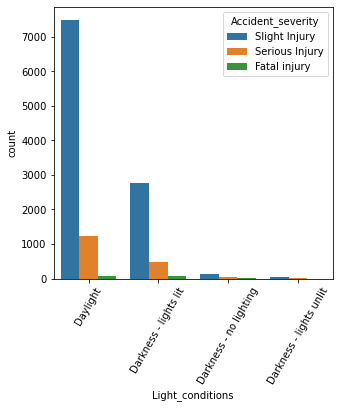

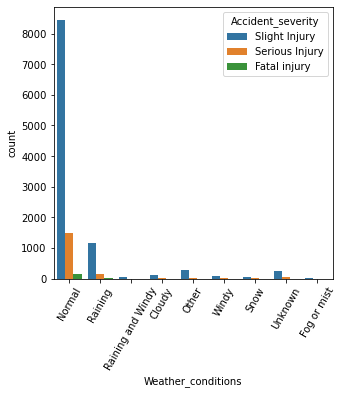

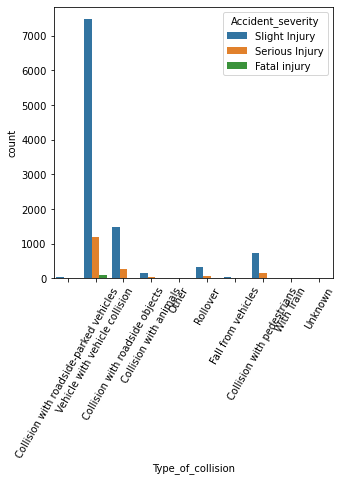

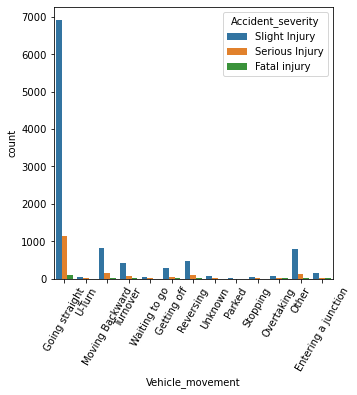

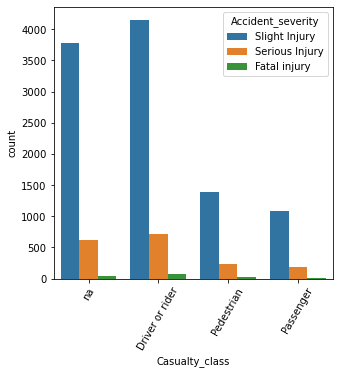

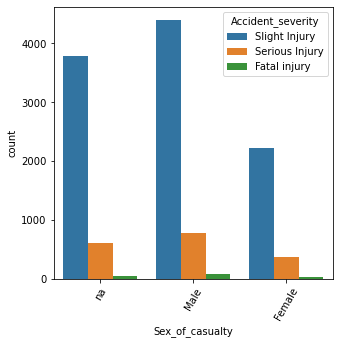

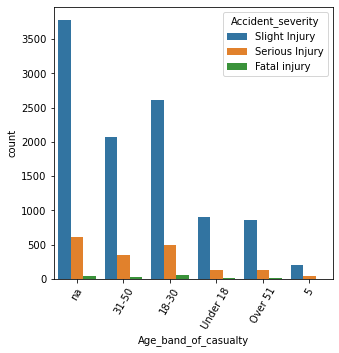

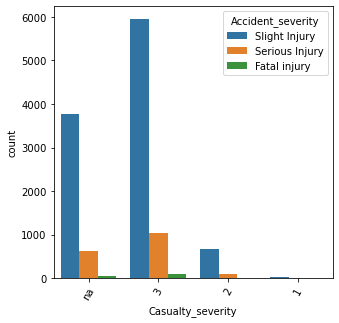

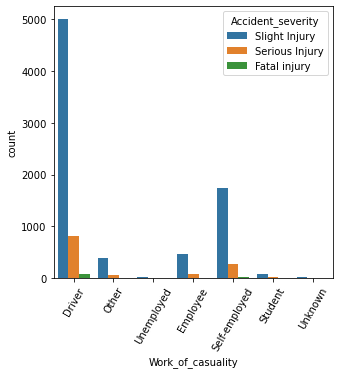

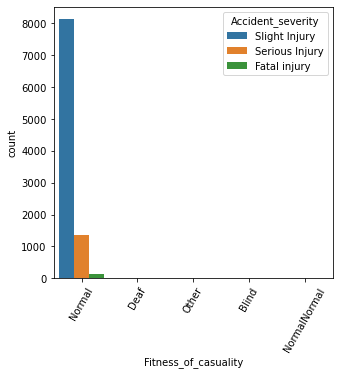

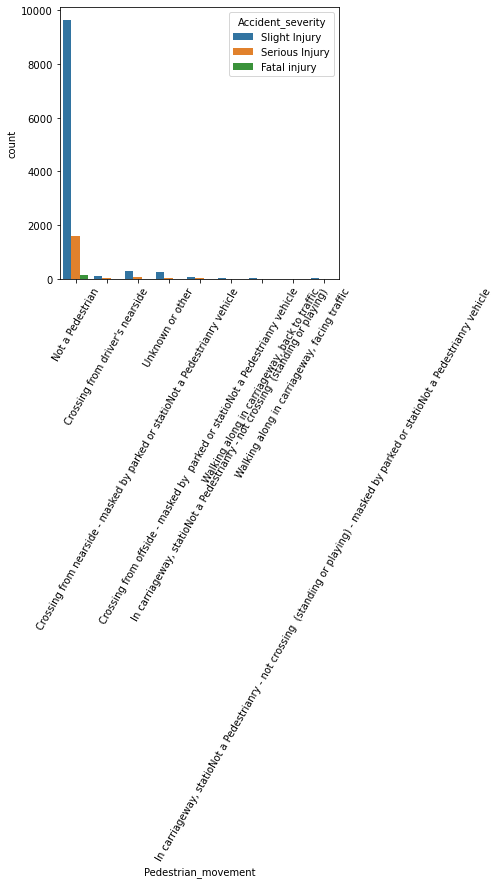

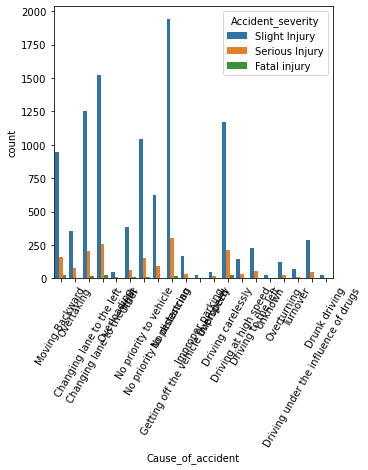

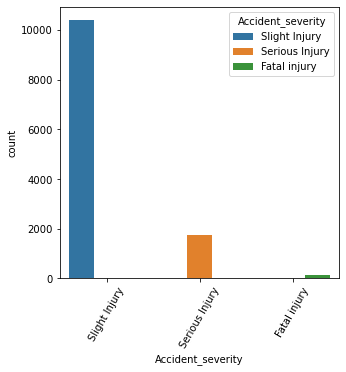

In [10]:
# data visualization of categorical cols

def count_plot(col):
    n_df[col].value_counts()
    
    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show
    
for col in obj_cols:
    count_plot(col)

# Data pre-processing

In [11]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [12]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [13]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

### Missing value treatment

In [14]:
feature_df = featureset_df.copy()

In [15]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [16]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

### One-Hot encoding using ‘get_dummies()’ method

In [17]:
# Categorical features to encode using one hot encoding 
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# setting input features X and target y 
X = feature_df[features]  # here features are selected from 'object' datatype
y = n_df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

### Target encoding using ‘LabelEncoder()’ method

In [18]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


### Feature selection using the ‘Chi2’ Statistic

In [19]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

### Imbalance data treatment using the ‘SMOTENC’ technique



In [21]:
import numpy as np

# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

/Users/jameslim/miniforge3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/jameslim/miniforge3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [22]:
# print the target classes distribution
print(y_n.value_counts())

2    10415
1    10415
0    10415
dtype: int64


### Modeling

In [23]:
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

0.9416306609057449

### Evaluation

In [24]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2085
           1       0.84      0.83      0.84      2100
           2       0.86      0.87      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



In [25]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8838187418909502


# Deployment using streamlit

In [27]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
# joblib.dump(oencoder, "ordinal_encoder2.joblib")
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [28]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']